In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

# HeatMap function
The heatmap function takes in a 2d array or a dataframe as input.

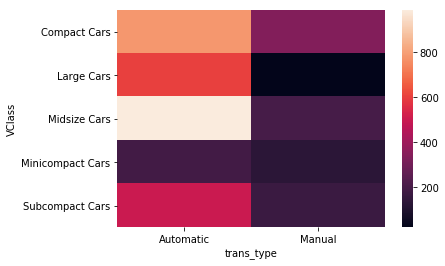

In [8]:
# get np. of cars in each combination of two varible levels as a pandas series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
# convert series into a dataframe
ct_counts = ct_counts.reset_index(name = 'count')
# rearrange data
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
# plot the heatmap
sb.heatmap(ct_counts);

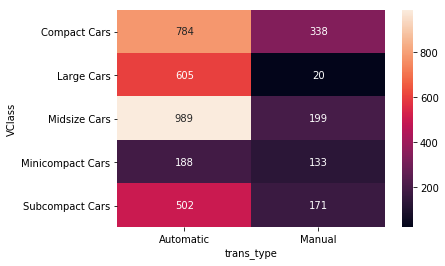

In [9]:
# fmt = 'd' means decimal
sb.heatmap(ct_counts, annot = True, fmt = 'd');

# Clustered Bar Charts
To display distribution in counts.


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

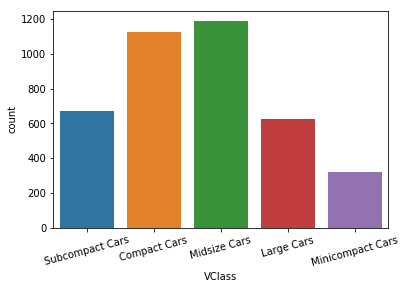

In [14]:
# univariate
sb.countplot(data = fuel_econ, x = 'VClass')
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

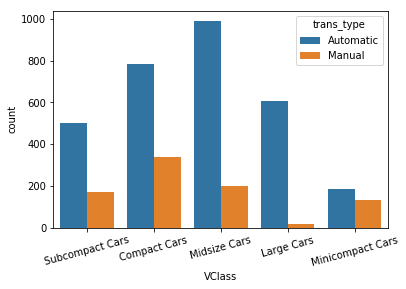

In [13]:
# bivariate
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15)